# 基盤技術開発テクニック練習ノートブック

## 目次
1. 説明
2. 準備
3. 実装
4. 演習


## 1. このノートブックについての説明
数式の実装には多くの解があります．例えば，行列演算の実装はfor文によって要素ずつ計算する方法と行列計算ライブラリによって計算する方法と大きく分けて二通りがあります．

このノートブックには，古川研究室でよく使われる行列演算の典型的なテクニックをできるだけ網羅してjupyter notebookにまとめました．　

jupyter notebookにまとめることによって，　実際にプログラムを実行しながら**道具の存在を知ってもらう**・学習できるようになることを目標に作りました．

### 1.1 mission success criteria
このノートブックを使うことにより達成すべき要件は以下になります．

||ミニマムサクセス|スタンダードサクセス|フルサクセス|
|-:|:-|:-|:-|
|ノートブックについて|このノートブックを最後まで実行できる．|演習問題・実践問題を全て取り組むことができる|不要な表現の削除，必要な機能の追加等適宜このノートブックを更新できる．|
|各機能について　|各機能の入力と出力（どのようなshapeになっているか）が説明できる|各機能でどのような演算が行われているか説明できる|各機能のオプション（オプション引数）を把握している|


### 1.2 参考文献とレベル感の共有

このノートブックでも必要再現の操作は抑えますが，事前知識として以下の本を読むことを推奨します．

Dropboxにpdfがあるので手元におくのを推奨します．

- Level.0（Pythonをまったく触ったときない・プログラミング全くの初心者・数値計算がわからない人はここから）: 「[ゼロからつくるPython機械学習プログラミング入門](https://www.dropbox.com/s/7r6cbcux1br1jhb/%E3%82%BC%E3%83%AD%E3%81%8B%E3%82%89%E4%BD%9C%E3%82%8BPython%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92%E3%83%97%E3%83%AD%E3%82%B0%E3%83%A9%E3%83%9F%E3%83%B3%E3%82%B0%E5%85%A5%E9%96%80_pass.pdf?dl=0)」

  - chapter2：Python入門
    - 2.1.3 **jupyter notebook**
  - chapter3：数学のおさらい
  
  
- level.2（Pythonを別の分野で触ったことある，別の言語で数値計算をしたときがある人はここから）：「[Numpyデータ処理入門](https://www.dropbox.com/s/kvqxd743johvztu/Numpy%E3%83%87%E3%83%BC%E3%82%BF%E5%87%A6%E7%90%86%E5%85%A5%E9%96%80.pdf?dl=0)」

  - 1.2: ブロードキャスト
  - 1.3: ブロードキャスト
  - 2.1: reshape
  - 2.6: argmax
  - 2.7: transpose
  - 2.10: matplotlib
  - 2.17:random
  - 2.25: np.newaxis(=None)
  - 3.4 sum
  - 3.9: meshgrid
  - 4.2: 線形回帰
  
- level.4（実践に近いところから学んでいきたい人はここから）：このノートブック(複数のメソッドの組み合わせで機能を実現する)（flab_techniqs）

- level.6（Level.2の内容がそれぞれ何をするかがだいたいわかった人・実践に近いところ学んでいきたい人はここから）：flab_techniqs_instance_ver（実例をだしてその）

- level.10：SOM，UKRの実装

## 2. 機能（モジュール）の紹介と準備
ここからは，jupyterの機能を使い，プログラムを実行しながらモジュール（ライブラリ）を見ていきましょう．
それでは，次の灰色のセル（import numpy as np）から shift+enter でプログラムを実行しください．（jupyter notebookについてわからない人はゼロからつくるPython機械学習プログラミング入門の2.1.3を読んでください）．

### 2.1 [Numpy](https://numpy.org/doc/stable/user/index.html)

NumpyはPythonで科学的な計算を行うための基本的なパッケージです。行列計算は機械学習に限らず数値計算の基本であり，Numpyはその行列計算を高速に計算します．

In [4]:
# numpyをimportします． as npで短縮してnpという名前で使うのが一般的です．
import numpy as np

In [2]:
# 5次元の単位行列を作ります．
A = np.eye(5)

# 中身を確認します．
print(A)
# 配列のサイズを確認します． (5, 5)は 5　x　５の行列になっているという意味です． 
# また， jupyterではセルの最後の行はprint()と括らなくても出力されます．
A.shape

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


(5, 5)

### 2.2 [Matplotlib](https://)
MatplotlibはPythonの描画パッケージです． （描画の実装で悩むのはアルゴリズムの実装と理解にはあまり関係ないので，困ったら知ってる人に効くことをおすすめします．）

In [5]:
# numpyをimportします． as npで短縮してnpという名前で使うのが一般的です．
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
N = 12 # データ数
D = 2 # 次元数

# 二次元データをN個つくります．
X = np.arange(N * D).reshape(N,D)
print(X, X.shape)

[[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 6  7]
 [ 8  9]
 [10 11]
 [12 13]
 [14 15]
 [16 17]
 [18 19]
 [20 21]
 [22 23]] (12, 2)


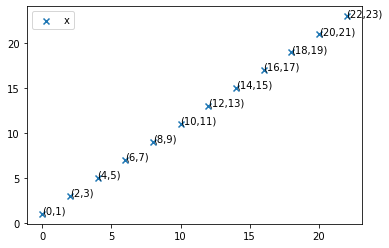

In [4]:
# 散布図(scatter)で描画します． 
## 第一引数にはx座標の値のベクトル．第二引数にはy座標の値のベクトルをいれます．
plt.scatter(X[:,0], X[:,1], marker='x', label='x')
[plt.text(X[n,0], X[n,1], "("+str(X[n,0])+","+str(X[n,1])+")") for n in range(N)]
plt.legend()
print("")

### 2.3 [Jax, Jaxlib](https://github.com/google/jax)

自動微分パッケージです． JaxはNumpyの延長の感覚で今の時代にあわせた機械学習の機能を提供してくれます．
- [JAX入門～高速なNumPyとして使いこなすためのチュートリアル～](https://qiita.com/koshian2/items/44a871386576b4f80aff)

In [1]:
import jax,jaxlib
import jax.numpy as jnp

# NumPyではnp.arange(25, dtype=np.float32).reshape(5, 5)
x = jnp.arange(25, dtype=jnp.float32).reshape(5, 5)
print(x)

# ↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ GPUがないPCだと以下のWarningがでるはず
# WARNING:absl:No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)
# ↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓

[[ 0.  1.  2.  3.  4.]
 [ 5.  6.  7.  8.  9.]
 [10. 11. 12. 13. 14.]
 [15. 16. 17. 18. 19.]
 [20. 21. 22. 23. 24.]]


### 2.4 Scipy
機械学習に限らない処理にまつわるライブラリです．以下のような操作ができます．

- ファイル入出力: scipy.io
- 特殊関数: scipy.special
- 線形代数演算: scipy.linalg
- 高速 Fourier 変換: scipy.fftpack
- 最適化とフィット: scipy.optimize
- 統計と乱数: scipy.stats
- 補間: scipy.interpolate
- 数値積分: scipy.integrate
- 信号解析: scipy.signal
- 画像処理: scipy.ndimage
- 科学技術計算の総合演習

(-0.5, 1023.5, 767.5, -0.5)

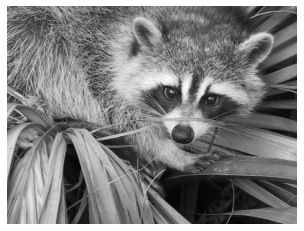

In [4]:
import scipy
from scipy import misc
face = misc.face(gray=True)
plt.imshow(face, cmap=plt.cm.gray)    
plt.axis('off')

(-0.5, 1270.5, 1176.5, -0.5)

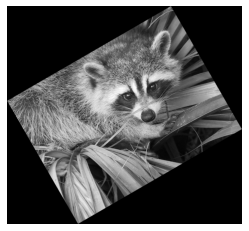

In [5]:
# ちょっとした画像の編集もできる
from scipy import ndimage
rotated_face = ndimage.rotate(face, 30)
plt.imshow(rotated_face, cmap=plt.cm.gray)    
plt.axis('off')

### 2.5 [Sklearn](https://scikit-learn.org/stable/)
一般的な機械学習のライブラリです．
（ちなみに，よくある間違いとして，開発環境にインストールするときは， pip install sklearnではなく， pip install scikit-learnとする必要があります．）

- 分類（classification）
- 回帰（regression）
- 次元圧縮（dimensionality reduction）
- クラスタリング（clustering）

In [6]:
from sklearn.datasets import load_iris
# 典型的な機械学習のデータを準備できる
iris = load_iris()
print(iris)
# 辞書型配列になっている
# dataというkeywordに，　irisの特徴量情報がnp.arrayとしてvalueに入っている．
# targetというkeywordに， irisの種別情報がvalueに入っている．
print("")
data = iris['data']
print(data.shape)
# (データ数, 特徴量次元）

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(data)
feature = pca.transform(data)
feature.shape
# ４次元を２次元に次元削減できた．

(150, 2)

### 2.6[ライブラリの関数（オブジェクトの）の引数の確認](https://python.atelierkobato.com/help/)

pythonのオブジェクトには docstring とよばれる説明文（ドキュメント）が付属していて、help()関数を使って呼び出すことができるようになっています。

引数や出力の詳細が知りたい場合は以下のように呼び出すことができます．例えば，np.eyeという関数の存在は知っていたが引数は忘れていた場合．

In [12]:
help(np.eye)

Help on function eye in module numpy:

eye(N, M=None, k=0, dtype=<class 'float'>, order='C', *, like=None)
    Return a 2-D array with ones on the diagonal and zeros elsewhere.
    
    Parameters
    ----------
    N : int
      Number of rows in the output.
    M : int, optional
      Number of columns in the output. If None, defaults to `N`.
    k : int, optional
      Index of the diagonal: 0 (the default) refers to the main diagonal,
      a positive value refers to an upper diagonal, and a negative value
      to a lower diagonal.
    dtype : data-type, optional
      Data-type of the returned array.
    order : {'C', 'F'}, optional
        Whether the output should be stored in row-major (C-style) or
        column-major (Fortran-style) order in memory.
    
        .. versionadded:: 1.14.0
    like : array_like
        Reference object to allow the creation of arrays which are not
        NumPy arrays. If an array-like passed in as ``like`` supports
        the ``__array_functi

jupyter notebook, jupyter labでは ?という簡易記号を使ってオブジェクトの情報を可視化することができます．

ちなみに，　エディター上で知りたい関数の上で Shift + Tabキーを押してもオブジェクトの情報をカーソルオーバーで表示できます．

In [13]:
np.eye?

Signature: np.eye(N, M=None, k=0, dtype=<class 'float'>, order='C', *, like=None)
Docstring:
Return a 2-D array with ones on the diagonal and zeros elsewhere.

Parameters
----------
N : int
  Number of rows in the output.
M : int, optional
  Number of columns in the output. If None, defaults to `N`.
k : int, optional
  Index of the diagonal: 0 (the default) refers to the main diagonal,
  a positive value refers to an upper diagonal, and a negative value
  to a lower diagonal.
dtype : data-type, optional
  Data-type of the returned array.
order : {'C', 'F'}, optional
    Whether the output should be stored in row-major (C-style) or
    column-major (Fortran-style) order in memory.

    .. versionadded:: 1.14.0
like : array_like
    Reference object to allow the creation of arrays which are not
    NumPy arrays. If an array-like passed in as ``like`` supports
    the ``__array_function__`` protocol, the result will be defined
    by it. In this case, it ensures the creation of an array o

# 3. 実装


### 3-0. Reshape
さっきでてきた
> X = np.arange(N*D).reshape(N,D)

これです．

[reshape](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html)はデータの形（サイズ）を変更するときに使います．

In [16]:
# xxx, yyy を適当な整数に変えて実行してください
N, D = 3,4
# N, D = 8, 2

# NxD次元ベクトルを作ります．
X = np.arange(N*D)
print("Xのshapeは", X.shape, N*D,"次元ベクトル（",N*D,"個要素がある）ということです．")
print(X)
X_m = X.reshape(N,D)
print(X_m)
print("\n")
print("これに対して, N, D =",N,",",D,"として X.reshape(N,D)とすると", X_m.shape,"の行列になります")

Xのshapeは (12,) 12 次元ベクトル（ 12 個要素がある）ということです．
[ 0  1  2  3  4  5  6  7  8  9 10 11]
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


これに対して, N, D = 3 , 4 として X.reshape(N,D)とすると (3, 4) の行列になります


In [17]:
print("また，逆にベクトルに戻すには以下のようにする．")

print('X.reshape(-1)', X.reshape(-1))

また，逆にベクトルに戻すには以下のようにする．
X.reshape(-1) [ 0  1  2  3  4  5  6  7  8  9 10 11]


#### 演習問題0
以上の操作を任意の行列で実践せよ．

In [21]:
n,d=2,5
X=np.arange(n*d)
print(X)
X_nd=X.reshape(n,d)
print(X_nd)
X_1=X.reshape(-1)
print(X_1)

[0 1 2 3 4 5 6 7 8 9]
[[0 1 2 3 4]
 [5 6 7 8 9]]
[0 1 2 3 4 5 6 7 8 9]


### 3-1. Broadcast
詳しい定義は[上島さんの解説記事](https://www.kamishima.net/mlmpyja/nbayes2/broadcasting.html).
使い方やイメージが欲しいなら[ここ](https://deepage.net/features/numpy-broadcasting.html).

In [22]:
I = 3
J = 4
A = np.arange(I)[:, None] + 1
print("Aのshapeは",A.shape," で，A自体は",'\n',A, "\n")
B = np.arange(I*J).reshape(I,J)
print("Bのshapeは",B.shape," で，B自体は",'\n', B, "\n")

print("この行列A,Bに対して B-A という演算をすると","\n", B - A,"となる")

# B - A

Aのshapeは (3, 1)  で，A自体は 
 [[1]
 [2]
 [3]] 

Bのshapeは (3, 4)  で，B自体は 
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]] 

この行列A,Bに対して B-A という演算をすると 
 [[-1  0  1  2]
 [ 2  3  4  5]
 [ 5  6  7  8]] となる


行列演算はシェイプが違う行列同士の演算は定義されていない（というかできない）が， Broadcastをサポートしているライブラリではある条件を満たした場合特殊な演算ができる（されてしまう）．

今回のケース:
A行列(shape:(3,1))とB行列(shape:(3,4))はshapeが違うので演算できない． 
Broadcastでは， A行列(3,1)を列方向にコピーしてA_hat(3,4)の行列を作ってB - A_hatの演算をおこなう．

In [23]:
print("具体的には 以下のような演算をする")
A_hat = np.tile(A, J)
print("A_hat:","\n",A_hat)
print("B - A_hat:", "\n", B - A_hat,"\n", "先ほどの B-Aの演算と一致する．")

具体的には 以下のような演算をする
A_hat: 
 [[1 1 1 1]
 [2 2 2 2]
 [3 3 3 3]]
B - A_hat: 
 [[-1  0  1  2]
 [ 2  3  4  5]
 [ 5  6  7  8]] 
 先ほどの B-Aの演算と一致する．


#### 演習問題1-a 
列方向のコピーではなく，行方向のコピーが行われるBroadcastの計算を実装せよ． (任意の四則演算）

In [26]:
A=np.arange(4).reshape(1,4)
print(A)
print(B)
A_trans=np.tile(A,(3,1))
print(A_trans)
print(B-A_trans)

10,4,1 10,1,3 10,4,3

[[0 1 2 3]]
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[0 1 2 3]
 [0 1 2 3]
 [0 1 2 3]]
[[0 0 0 0]
 [4 4 4 4]
 [8 8 8 8]]


#### 演習問題1-b 
先ほどは行列(shapeが(I, J)のような変数）に対しての演算であった．3階のテンソルの変数（shapeが （I,J,K））に対して，任意のBroadcastの計算を実装せよ．

In [29]:
xx,yy,zz=3,4,5
B=np.arange(xx*yy*zz).reshape(xx,yy,zz)
A=np.arange(4*5).reshape(1,yy,zz)
A_trans=np.tile(A,(xx,1,1))

print(B)
print(A)
print(B-A)
print(B-A_trans)


[[[ 0  1  2  3  4]
  [ 5  6  7  8  9]
  [10 11 12 13 14]
  [15 16 17 18 19]]

 [[20 21 22 23 24]
  [25 26 27 28 29]
  [30 31 32 33 34]
  [35 36 37 38 39]]

 [[40 41 42 43 44]
  [45 46 47 48 49]
  [50 51 52 53 54]
  [55 56 57 58 59]]]
[[[ 0  1  2  3  4]
  [ 5  6  7  8  9]
  [10 11 12 13 14]
  [15 16 17 18 19]]]
[[[ 0  0  0  0  0]
  [ 0  0  0  0  0]
  [ 0  0  0  0  0]
  [ 0  0  0  0  0]]

 [[20 20 20 20 20]
  [20 20 20 20 20]
  [20 20 20 20 20]
  [20 20 20 20 20]]

 [[40 40 40 40 40]
  [40 40 40 40 40]
  [40 40 40 40 40]
  [40 40 40 40 40]]]
[[[ 0  0  0  0  0]
  [ 0  0  0  0  0]
  [ 0  0  0  0  0]
  [ 0  0  0  0  0]]

 [[20 20 20 20 20]
  [20 20 20 20 20]
  [20 20 20 20 20]
  [20 20 20 20 20]]

 [[40 40 40 40 40]
  [40 40 40 40 40]
  [40 40 40 40 40]
  [40 40 40 40 40]]]


### 3-2. Meshgrid

[Meshgrid](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html)は，座標ベクトルを入力すると座標行列を返してくれる関数です．

以下のような軸をx,y軸を想定して，そこにそれぞれ等間隔に点が打たれているとします．

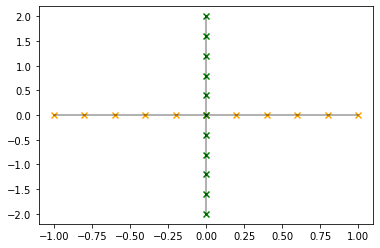

In [30]:
K = 11
A = np.linspace(-1,1,K)
B = np.linspace(-2,2,K)
plt.plot([A[-1], A[0]], [0,0], color='black', alpha=0.4)
plt.plot([0,0],[B[-1], B[0]], color='black', alpha=0.4)
plt.scatter(A,np.zeros(A.shape), color='orange', marker='x')
plt.scatter(np.zeros(B.shape),B, color='g', marker='x')

この点からそれぞれ垂直線をひくと以下の図のようなグリッドが描くことができます．

meshgrid関数は以下のような図の格子点(交わっているところ）の座標を取得したいときに使われる関数です．

この緑線とオレンジ線の交点の座標を求めます


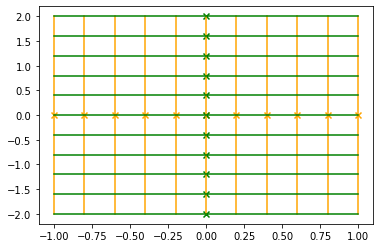

In [31]:
plt.scatter(A,np.zeros(A.shape), color='orange', marker='x')
plt.scatter(np.zeros(B.shape),B, color='g', marker='x')
[plt.plot(np.tile(A[i],K), B, color='orange') for i in range(K)]
[plt.plot(A, np.tile(B[i], K),  color='g') for i in range(K)]
print("この緑線とオレンジ線の交点の座標を求めます")

In [32]:
XX, YY = np.meshgrid(A,B)

print("二つのベクトルを入力すると二つの行列が返ってきます．")
print("XXのshapeは", XX.shape, 'YYのshapeは', YY.shape, "となる")
print("XX")
print(XX)
print("YY")
print(YY)

二つのベクトルを入力すると二つの行列が返ってきます．
XXのshapeは (11, 11) YYのshapeは (11, 11) となる
XX
[[-1.  -0.8 -0.6 -0.4 -0.2  0.   0.2  0.4  0.6  0.8  1. ]
 [-1.  -0.8 -0.6 -0.4 -0.2  0.   0.2  0.4  0.6  0.8  1. ]
 [-1.  -0.8 -0.6 -0.4 -0.2  0.   0.2  0.4  0.6  0.8  1. ]
 [-1.  -0.8 -0.6 -0.4 -0.2  0.   0.2  0.4  0.6  0.8  1. ]
 [-1.  -0.8 -0.6 -0.4 -0.2  0.   0.2  0.4  0.6  0.8  1. ]
 [-1.  -0.8 -0.6 -0.4 -0.2  0.   0.2  0.4  0.6  0.8  1. ]
 [-1.  -0.8 -0.6 -0.4 -0.2  0.   0.2  0.4  0.6  0.8  1. ]
 [-1.  -0.8 -0.6 -0.4 -0.2  0.   0.2  0.4  0.6  0.8  1. ]
 [-1.  -0.8 -0.6 -0.4 -0.2  0.   0.2  0.4  0.6  0.8  1. ]
 [-1.  -0.8 -0.6 -0.4 -0.2  0.   0.2  0.4  0.6  0.8  1. ]
 [-1.  -0.8 -0.6 -0.4 -0.2  0.   0.2  0.4  0.6  0.8  1. ]]
YY
[[-2.  -2.  -2.  -2.  -2.  -2.  -2.  -2.  -2.  -2.  -2. ]
 [-1.6 -1.6 -1.6 -1.6 -1.6 -1.6 -1.6 -1.6 -1.6 -1.6 -1.6]
 [-1.2 -1.2 -1.2 -1.2 -1.2 -1.2 -1.2 -1.2 -1.2 -1.2 -1.2]
 [-0.8 -0.8 -0.8 -0.8 -0.8 -0.8 -0.8 -0.8 -0.8 -0.8 -0.8]
 [-0.4 -0.4 -0.4 -0.4 -0.4 -0.4 -0.4 -0.4 -0.4 -0.4 -0

$XX_{ij}$にはx=i,y=-jの交点のx座標が， $YY_{ij}$にはx=i,y=-jの交点のy座標が格納されている，
言い換えると， x=i, y=-jの交点の座標は$( XX_{ij}, YY_{ij} )$ です．

meshgridを使うと，交点の座標の数値は得られました．ここからは使いやすい形に二つの行列を整形します．
使いやすい形とはいわゆるデータ行列のような(交点の数， 次元数）というような二次元配列です．つまり，

$M = \\
[(XX_{11}, YY_{11}),\\(XX_{12}, YY_{12}), \\(XX_{13}, YY_{13}), \\ \cdots, \\(XX_{KK}, YY_{KK)}] $

のような 
$\mathbf{R}^{(K*K)\times 2} = \mathbf{R}^{(P \times 2)} , P = K*K$の二次元行列$M$に整形します．
言い換えると，$M = ( \mathbf{m_p} )_{p=1}^{P}, \mathbf{m} \in \mathbb{R}^2$となります． 


まず，XXとYYは (K, K)のような二次元配列である必要ではないので， reshapeを使ってKxKの行列をM次元ベクトルに直します． 
次に， 1次元ベクトルxxとyyを横方向に結合するために， reshapeされた xx, yyを(M, 1)の行列に整形して，concatenateします．

In [33]:
xx = XX.reshape(-1)
yy = YY.reshape(-1)
M = np.concatenate([xx[:, None], yy[:, None]], axis=1)
M.shape

(121, 2)

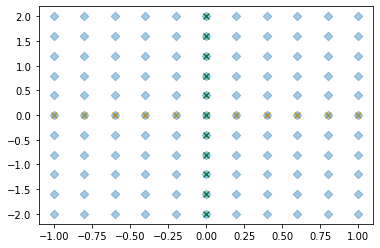

In [34]:
plt.scatter(A,np.zeros(A.shape), color='orange', marker='x')
plt.scatter(np.zeros(B.shape),B, color='g', marker='x')
plt.scatter(M[:, 0], M[:, 1], alpha=0.4, marker='D')

格子点行列Mができました．

#### 演習問題2

以上の操作を任意のベクトルの格子点で実践せよ

[-1.  1.]
[-2. -1.  0.  1.  2.]
(10,) (10,)
(2, 20, 10)
[[-1. -2.]
 [ 1. -2.]
 [-1. -1.]
 [ 1. -1.]
 [-1.  0.]
 [ 1.  0.]
 [-1.  1.]
 [ 1.  1.]
 [-1.  2.]
 [ 1.  2.]]


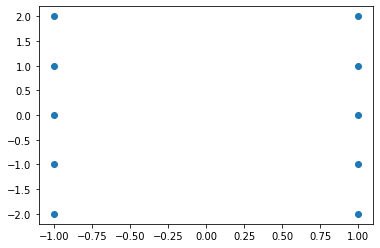

In [46]:
xx,yy=2,5
X=np.linspace(-1,1,xx)
Y=np.linspace(-2,2,yy)
print(X)
print(Y)
x,y=np.meshgrid(X,Y)
x=x.reshape(-1)
y=y.reshape(-1)
print(x.shape,y.shape)
print((np.array(m)).shape)
mesh=np.concatenate((x[:,None],y[:,None]),axis=1)
print(mesh)
plt.scatter(x,y)

### 3-3. Argmin, Argmax

>数学において、最大値を与える引数あるいは最大点集合 (argument of the maximum) は関数がその最大値をとる定義域の元全体の成す集合である[note 1]。省略してarg max (もしくは argmax) と書かれる。最大値が函数の出力のうち最も大きいものを指すのと対照に、最大点は最大値を出力する入力の値を指す。
最大点集合は一般に複数の元を含むが、それは有限集合であることも無限集合であることも起こり得るし、空となることもあり得る。

上が一応定義ですがとりあえず以下の例をみながら理解していきましょう．

例えば，先ほどのような格子点は以下のようなインデックスを持つ．

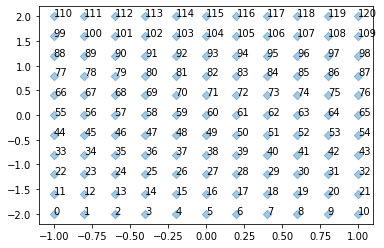

In [47]:
plt.scatter(M[:, 0], M[:, 1], alpha=0.4, marker='D')
[plt.text(M[n, 0], M[n, 1], str(n)) for n in range(K*K)]
print("")

さらに，この空間に以下のような新規点$\mathbf{x}_n$ができたとします．

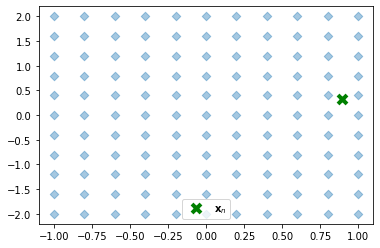

In [48]:
np.random.seed(6)
x = np.random.rand(2).reshape(1,2)

plt.scatter(M[:, 0], M[:, 1], alpha=0.4, marker='D')
plt.scatter(x[:, 0], x[:, 1], s=80, color='g', marker='x', label='$\mathbf{x}_n$', linewidths=4)
plt.legend()
# plt.text(X[:, 0]+0.05, X[:, 1], "$\mathbf{x}^*$", color='g', size=25)

$\newcommand{\argmax}{\mathop{\rm arg~max}\limits}$
$\newcommand{\argmin}{\mathop{\rm arg~min}\limits}$

ここでは， $\mathbf{x}_n$とそれに一番近い$\mathbf{m}_{k^*_n}$の点を求めます． 
${k^*_n}$は$n$番目のデータに対して一番近い$\mathbf{m}$のインデックスで勝者ノード番号とも呼ばれます（格子点の節のインデックス（番号）なのでノード番号とも呼ばれる）．
離散点はずっと固定なので，この勝者ノード番号を求めれば，一番近い点を求めたことになります．

この操作はを数式で書くと，
$k^*_n = \argmin_k D(\mathbf{x}_n, \mathbf{m}_k)$

$D(\mathbf{a},\mathbf{b})$は$\mathbf{a}$と$\mathbf{b}$の距離を返す関数で， $D(\mathbf{a},\mathbf{b})=\|\mathbf{a} - \mathbf{b} \|^2$とすると，

$k^*_n = \argmin_k \|\mathbf{x}_n - \mathbf{m}_k\|^2$ となります．


In [49]:
print(x.shape, M.shape)
Dist = np.sum((x[:, None, :] - M[None, :, :])**2, axis=2)
print(Dist.shape)

k_star = np.argmin(Dist)

k_star

(1, 2) (121, 2)
(1, 121)


75

データ$\mathbf{x}_n$に対応する勝者ノード番号は 75でした．

なので$\mathbf{x}_n$に対応する座標を$\mathbf{z}_n$とおくと

$\mathbf{z}_n := \mathbf{m}_{75}$

ということです

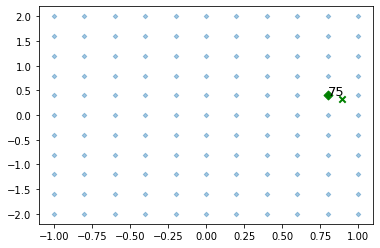

In [50]:
plt.scatter(M[:, 0], M[:, 1], alpha=0.4, marker='D', s=10)

z_n = M[k_star] 
plt.text(z_n[0], z_n[1], str(k_star), fontsize=13) 
# plt.text(M[k_star, 0], M[k_star, 1], str(k_star), fontsize=13) 

plt.scatter(z_n[0], z_n[1],  marker='D', s=40, color='g')
plt.scatter(x[:, 0], x[:, 1], s=40, color='g', marker='x', label='$\mathbf{x}_n$', linewidths=2)
print("")

データに一番近い格子点のインデックスが表示され，データと同じ色に着色されているのが確認できたと思います．


では次にデータ１点ではなく，N点で考えます．
データ集合$X = \{ \mathbf{x}_n\}_{n=1}^N$は以下のように生成されます．

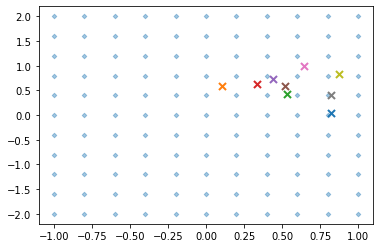

In [51]:
N = 9
X = np.random.rand(N*2).reshape(N,2)
cmap = plt.get_cmap("tab10") 

plt.scatter(M[:, 0], M[:, 1], alpha=0.4, marker='D', s=10)
for n in range(N):
    plt.scatter(X[n, 0], X[n, 1], color=cmap(n), s=50, marker='x', linewidths=2)

データ集合$X$に対応する勝者ノード集合$K^* = \{ k_n^*\}_{n=1}^N$は以下のように求めます．

In [52]:
print(X.shape, M.shape)
Dist = np.sum((X[:, None, :] - M[None, :, :])**2, axis=2)
print(Dist.shape)

K_star = np.argmin(Dist, axis=1)
K_star

(9, 2) (121, 2)
(9, 121)


array([64, 72, 74, 84, 84, 74, 85, 75, 86])

さらに，勝者ノード集合を用いて，データ集合$X$に対応するノード集合$Z = \{ \mathbf{m}_{k_n^*}\}_{n=1}^N$は描画します．

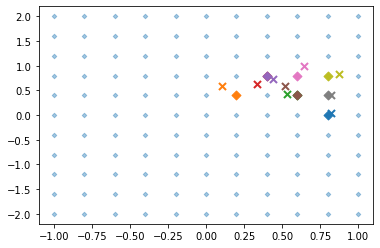

In [53]:
plt.scatter(M[:, 0], M[:, 1], alpha=0.4, marker='D', s=10)
for n in range(N):
    plt.scatter(X[n, 0], X[n, 1], color=cmap(n), s=50, marker='x', linewidths=2)
    
    z_n = M[K_star[n]]
    
    plt.scatter(z_n[0], z_n[1], marker='D', s=40, color=cmap(n))
    # plt.scatter(M[K_star[n], 0], M[K_star[n], 1], marker='D', s=40, color=cmap(n))

データに一番近いノードはそのデータの色になっていることがわかります（勝者ノードが重複している場合は上書きされる）

#### 演習問題3

3-1 seed値やデータ数を変えて経過を観察せよ

[[16 23]
 [ 7 11]
 [14 16]
 [ 9 26]
 [18 20]
 [14 21]
 [27 25]
 [23 28]
 [16  8]
 [15 16]]
[[16 22]
 [ 7 10]
 [14 15]
 [ 9 25]
 [18 19]
 [14 20]
 [27 24]
 [23 27]
 [16  7]
 [15 15]]
(40, 2)
(10, 2)
(10, 40, 2)
(10, 40)
(10,)


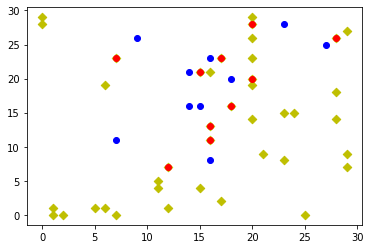

In [54]:
N = 40
D = 2
target=np.array([np.random.randint(0,30,2) for i in range(10)])
print(target)
b=np.arange(2)
print(target-b)
xy=np.random.randint(0,30,N*D).reshape(40,2)
xy=np.array([np.random.randint(0,30,2) for i in range(40)])
print(xy.shape)
#y=[np.random.randint(0,30,2) for i in range(40)]
plt.scatter(xy[:,0],xy[:,1],marker='D',color='y')
print(target.shape)
plt.scatter(target[:,0],target[:,1],color='b')
print(((target[:,None,:]-xy[None,:,:])**2).shape)
kyori=np.sum((target[:,None,:]-xy[None,:,:])**2,axis=2)
print(kyori.shape)
c=np.argmin(kyori,axis=1)
print(c.shape)
winner=xy[c]
plt.scatter(winner[:,0],winner[:,1],color='r')

In [95]:
a=[0]*10
print(a)
for i in range(10):
    a[i]=i
print(a)

a=[i for i in range(10) if i%2==0]
print(a)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 2, 4, 6, 8]


### 3-4. Fancy index

先ほど，データ集合$X$に対応するノード集合$Z$を求めるのにfor文を用いて実装した

つまり，

$\forall n, \mathbf{z}_n := \mathbf{m}_{k_n^*}$

`for n in range(N):`

`    z_n = M[K_ster[n]]`

とした．

これをfor文を使わないで実装するときに用いるのが Fancy Indexである．

イメージとしては以下になる（こんな数式はない）．

$Z = M[K^*]$

In [54]:
Z = M[K_star]
Z, Z.shape, M[0:11,:], M.shape, K_star, len(K_star)

(array([[0.8, 0. ],
        [0.2, 0.4],
        [0.6, 0.4],
        [0.4, 0.8],
        [0.4, 0.8],
        [0.6, 0.4],
        [0.6, 0.8],
        [0.8, 0.4],
        [0.8, 0.8]]),
 (9, 2),
 array([[-1. , -2. ],
        [-0.8, -2. ],
        [-0.6, -2. ],
        [-0.4, -2. ],
        [-0.2, -2. ],
        [ 0. , -2. ],
        [ 0.2, -2. ],
        [ 0.4, -2. ],
        [ 0.6, -2. ],
        [ 0.8, -2. ],
        [ 1. , -2. ]]),
 (121, 2),
 array([64, 72, 74, 84, 84, 74, 85, 75, 86]),
 9)

#### 演習問題4

 なし（いいのがあったら追加してください）

### 3-5. [Einsum](https://numpy.org/doc/stable/reference/generated/numpy.einsum.html)

Einsumはさまざまな行列計算を einsum記法というのを使って実装することができます．私たちの研究室では主にテンソル積（行列積の一般系）を実装するときに使うので，主にその機能だけ紹介します．



#### 5.1 行列積

$ y_{ij} = \sum_k h_{ik} * g_{kj}$ という行列積の計算をしたいとします．

In [8]:
H = np.random.rand(12).reshape(4, 3)
G = np.random.rand(6).reshape(3, 2)
Y_at = H @ G
print(Y_at.shape)

(4, 2)


通常考えられる実装が以上ですが，einsumで書くとこうです.

まずStringで入力変数がそれぞれどのようなshapeかを書き，その後 '->'の後に， 出力する変数のshapeを書きます．

In [9]:
Y_ein = np.einsum('IK, KJ -> IJ', H, G)
print(np.allclose(Y_at, Y_ein))

False


Trueとなっていると，同じものが出力できています．

これだと， @ が使えるのでメリットを感じませんが，

この場合はどうでしょう．
$ y_{ij} = \sum_k h_{ik} * $ **$g_{jk}$**

In [19]:
H = np.random.rand(12).reshape(4, 3)
G = np.random.rand(6).reshape(2, 3)
Y_at = H @ G.T
# print(np.allclose(Y_at,Y_ein))
# H = np.arange(4,16).reshape(4, 3)
# G = np.arange(6).reshape(2, 3)

この場合 @ を使うには転置が必要です．

In [45]:
Y_at = H @ G.T
print(np.allclose(Y_at,Y_ein))

False


In [20]:
Y_ein=np.einsum('IK,JK -> IJ',H,G)
print(Y_at.shape,Y_ein.shape)
print(np.allclose(Y_at,Y_ein))
print(Y_at.shape,Y_ein.shape)
print(Y_at)
print(Y_ein)

(4, 2) (4, 2)
True
(4, 2) (4, 2)
[[0.14062252 0.66686679]
 [0.56895382 1.35602768]
 [0.79519117 1.35046459]
 [0.58474505 0.80447863]]
[[0.14062252 0.66686679]
 [0.56895382 1.35602768]
 [0.79519117 1.35046459]
 [0.58474505 0.80447863]]


#### 5.2 テンソル積
テンソル積とは例えば，以下のようなテンソルのある軸に対して行列積のような計算をすることです．￥

$ y_{ijk} = \sum_l \sum_m   h_{ikl} * g_{klm} * f_{jkm}$

この場合はもはや行列積を使って，単的な実装をすることは不可能です． そこで使えるのがeinsumです．

In [25]:
I, J, K = 2, 3, 4
L, M = 4, 6
H = np.random.rand(I * K * L).reshape(I, K, L)
G = np.random.rand(K * L * M).reshape(K, L, M)
F = np.random.rand(J * K * M).reshape(J, K, M)
print(F.shape)
Y_ein = np.einsum('IKL, KLM, JKM -> IJK', H, G, F)
Y_ein.shape

(3, 4, 6)


(2, 3, 4)

In [10]:
print(np.linspace(0,10,11))

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


#### 演習問題5

5-1 for文で上に出てきた数式を実装せよ

5-2（Ex） 行列積以外のeinsumの機能を調べよ

In [32]:
I, J, K = 2, 3, 4
L, M = 4, 6
H = np.random.rand(I * K * L).reshape(I, K, L)
G = np.random.rand(K * L * M).reshape(K, L, M)
F = np.random.rand(J * K * M).reshape(J, K, M)
Y_ein = np.einsum('IKL, KLM, JKM -> IJK', H, G, F)
Y_ein.shape
Y=[[[0 for _ in range(K)] for _ in range(J)]for _ in range(I)]
for i in range(I):
    for j in range(J):
        for k in range(K):
            for l in range(L):
                for m in range(M):
                    Y[i][j][k]+=H[i][k][l]*G[k][l][m]*F[j][k][m]
yy=np.array(Y)
print(yy)
print(Y_ein)

print(np.allclose(yy,Y_ein))

[[[2.08424693 2.84718161 3.11931326 4.65490249]
  [1.79570984 2.52968458 3.752155   4.15514634]
  [1.67276077 2.70036572 2.19106289 2.55068539]]

 [[2.96755502 1.86137038 2.94016691 2.88203933]
  [2.58544509 1.90714423 3.49713594 2.5952025 ]
  [2.33175675 2.02528436 1.77702545 1.71490521]]]
[[[2.08424693 2.84718161 3.11931326 4.65490249]
  [1.79570984 2.52968458 3.752155   4.15514634]
  [1.67276077 2.70036572 2.19106289 2.55068539]]

 [[2.96755502 1.86137038 2.94016691 2.88203933]
  [2.58544509 1.90714423 3.49713594 2.5952025 ]
  [2.33175675 2.02528436 1.77702545 1.71490521]]]
True


**注意点**
1. numpyのeinsumはoptimizeのオプション引数があり，optimize=Trueとすると，速度が速くなるが，使わない場合はかなり実行速度が遅くなる. pytorchにもeinsumの機能はあるが，optimizeがないため遅い．必要な箇所だけeinsumを使うべき

2. 上の例では K, Lが同じ数字になっているため，同じ文字を使った方がいいと思うかもしれないが，計算の仕方が変わるため，必ずまとめたい軸に対してのみ同じ文字を使うようにしてください．
> Y_ein = np.einsum('ILL, LLM, JLM -> IJL', H, G, F)

このように書くと全く別の演算になってしまう．

### 6. Jax
自動微分機能を主に使います．

例えば以下のように$\mathbf{x}$を入力とする目的関数があるとします．

$ E(\mathbf{x}) = \mathbf{x}^T A \mathbf{x} $

特に, Aが単位行列の時
$ E(\mathbf{x}) = x_1^2 + x_2^2$ です．

このような目的関数を最小にするような$\mathbf{x}$を求めるときに使われる一つのやり方が勾配法です．今回は勾配法の一番シンプルな方法．最急降下法を実装します．

#### 最急降下法

勾配法は $n$次ベクトル $\mathbf{x} = (x_1,x_2,...,x_n)$を引数とする目的関数 $f(\mathbf{x})$ の極値を求める手法の一つである.

反復法, 学習を繰り返して $\mathbf{x}$を更新する.
$t$時刻目の学習の解が$\mathbf{x}^{(t)}$であるとき, 最急降下法では次のように値を更新する.

$\mathbf{x}^{(t+1)} = \mathbf{x}^{(t)}-\eta \frac{dE\left(\mathbf{x}^{(t)}\right) }{d\mathbf{x}^{(t)}} $

ここで$\eta$はステップ幅である. ステップ幅が大きくなると更新量は大きくなるが発散の恐れがある. 逆にステップ幅が小さすぎると学習は遅れてしまう.

In [6]:
x = jnp.array([2.0,2.0])
A = jnp.array([[1.0,0.0],[0.0,1.0]])

print(x.shape,A.shape)

def E(x, A): # 目的関数を計算するメソッド
    Error = jnp.einsum("i,ij,j",x,A,x)
    return Error


eta = 0.5
n_epoch = 50

history ={} # 値保存用変数
history['x1'], history['x2'], history['E'] = np.zeros((n_epoch)), np.zeros((n_epoch)), np.zeros((n_epoch))

for epoch in range(n_epoch):
    history['x1'][epoch] = x[0] # 現epochの値を格納
    history['x2'][epoch] = x[1] # 現epochの値を格納
    history['E'][epoch] = E(x, A) # 現epochの値を格納

    dEdx = jax.grad(E, argnums=0)(x, A) # 勾配を計算
    x = x - eta * dEdx # 勾配を使って値を更新

(2,) (2, 2)


epochごとに，目的関数の値が減少していくかを確認します．

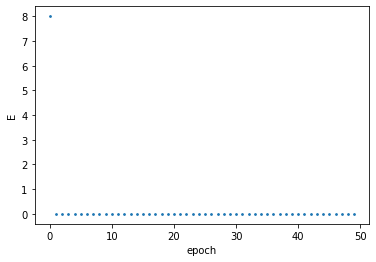

In [163]:
fig = plt.figure()
plt.xlabel('epoch')
plt.ylabel('E')
plt.scatter(range(len(history['E'])), history['E'], s=3)

次に，どういうエネルギー曲面になっているかを描画してみましょう(実行に数分かかる場合があります）

3


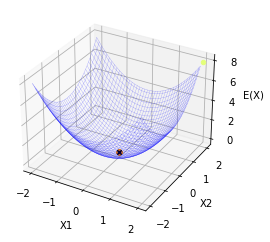

In [164]:
# 描画ようのメソッド
x = np.arange(-2, 2, 0.05) # x点として[-2, 2]まで0.05刻みでサンプル
y = np.arange(-2, 2, 0.05)  # y点として[-2, 2]まで0.05刻みでサンプル
x, y = np.meshgrid(x, y)  # 上述のサンプリング点(x,y)を使ったメッシュ生成
z = (x**2 + y**2)  # (x^2+y^2))  を計算してzz座標へ格納する。
   
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')
import matplotlib.cm as cm

def init():
    return fig,

def animate(i):
    plt.cla()
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('E(X)')
    # ax.view_init(elev=30., azim=3.6*-i) # 回したいとき
    # ax.view_init(elev=0.,azim=3.6*35) # 勾配みたいとき
    ax.plot_wireframe(x, y, z, color='blue',linewidth=0.3, alpha=0.4)
    
    for j in range(i):
        ax.scatter(history['x1'][j],history['x2'][j],history['E'][j], color=cm.Wistia(j/i))
    ax.scatter(history['x1'][i],history['x2'][i],history['E'][i], color='k',marker='x')
    return fig,

ani = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=n_epoch, interval=100, blit=True)   
print(3)
# ani.save('anim_roll.gif', writer="imagemagick")

HTML(ani.to_jshtml())
# ani

#### 演習問題6

3-1 $\mathbf{x}$の初期値を変えて経過を観察せよ

3-2 $A$ の値を変えて経過を観察せよ

3-3 $\eta$ の値を変えて経過を観察せよ

## 4. 実装
ここでは，上で得た知識を使って様々な計算を実装していく

### I.距離行列


#### I.a 一次元空間
データ$A=\{a_n\}_{n=1}^N$と構造$B=\{b_k\}_{k=1}^K$の要素の間の距離を測れ．

つまり， $D_{ij} = Dist(a_i, b_j)$ のような距離行列(N x K)を求めよ．

*$Dist(a,b)$は$a,b$を入力として実数を返す距離関数．ここでは任意の距離関数を用いて良い．

(5,) (10,)


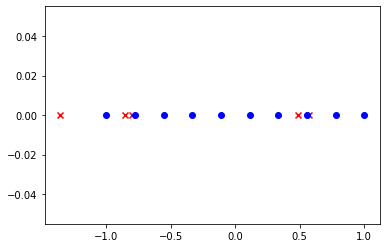

In [63]:
N, K = 5, 10
A = np.random.randn(N)
B = np.linspace(-1,1, K)
plt.scatter(A, np.zeros(len(A)), color='r', marker='x')
plt.scatter(B, np.zeros(len(B)), color='b')
print(A.shape,B.shape)

In [64]:
print(A.shape,B.shape)
A=A[:,None]
B=B[None,:]
d=(A-B)**2#1が変更する
print(d.shape,A.shape,B.shape)
m=np.argmin(d,axis=1)
print(m)


(5,) (10,)
(5, 10) (5, 1) (1, 10)
[1 1 7 0 7]


#### I.b 二次元空間
データ$A=\{\mathbf{a}_n\}_{n=1}^N, \mathbf{a}\in \mathbb{R}^2$と構造$B=\{\mathbf{b}_k\}_{k=1}^K,\mathbf{b}\in \mathbb{R}^2$の要素の間の距離を測れ．



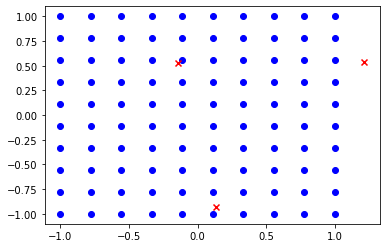

In [80]:
N, K = 3, 10
D = 2
A = np.random.randn(N,D).reshape(N,D)
b = np.linspace(-1,1, K)
xx, yy = np.meshgrid(b, b)
B = np.concatenate([xx.reshape(-1)[:, None], yy.reshape(-1)[:, None]], axis=1)
plt.scatter(B[:,0], B[:,1], color='b')
plt.scatter(A[:,0], A[:,1], color='r', marker='x')

(3, 2) (100, 2)
(3, 100)
(3, 2)
[[-0.11111111  0.55555556]
 [ 0.11111111 -1.        ]
 [ 1.          0.55555556]]
111111111111111
[-0.11111111  0.11111111  1.        ]
[-0.11111111  0.55555556]
[[-0.11111111  0.55555556]
 [ 0.11111111 -1.        ]
 [ 1.          0.55555556]]


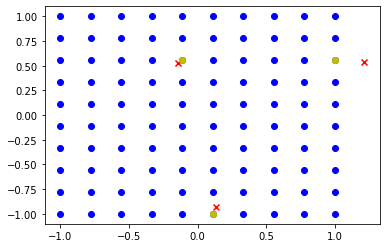

In [86]:
print(A.shape,B.shape)
A_trans=A[:,None,:]
B_trans=B[None,:,:]
d=np.sum((A_trans-B_trans)**2,axis=2)
print(d.shape)
num=np.argmin(d,axis=1)
ans=B[num]
print(ans.shape)
print(ans)
plt.scatter(B[:,0], B[:,1], color='b')
plt.scatter(A[:,0], A[:,1], color='r', marker='x')
plt.scatter(B[num,0],B[num,1],color='y')
print(111111111111111)
print(B[num,0])
print(B[num][0])#違うのびっくり
print(B[num])

#### I.c 任意次元数の空間
データ$A=\{\mathbf{a}_n\}_{n=1}^N, \mathbf{a}\in \mathbb{R}^D$と構造$B=\{\mathbf{b}_k\}_{k=1}^K,\mathbf{b}\in \mathbb{R}^D$の要素の間の距離を測れ．

データと構造を定義するところからはじめよ．処理に任意の次元に対応できるようすればいいだけで，次元数は３でよい．

(5, 100)
1
(5, 3)


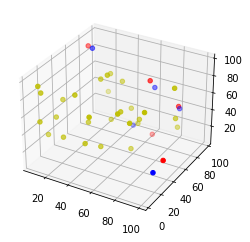

In [148]:

d=np.sum((A[:,None,:]-B[None,:,:])**2,axis=2)
print(d.shape)
num=np.argmin(d,axis=1)
test=set([i for i in range(30)])
nokori=test-set(num)
print(1)
nokori=np.array(list(nokori))
ans=B[num]
losser=B[nokori]
print(ans.shape)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(A[:,0],A[:,1],A[:,2],color='r')
ax.scatter(losser[:,0],losser[:,1],losser[:,2],color='y')
ax.scatter(ans[:,0],ans[:,1],ans[:,2],color='b')

In [9]:
dim=3
N=100
n=5
kazu=np.random.randint(dim,dim*2,dim)
print(kazu)
B=np.random.randint(0,100,(N,dim))
A=np.random.randint(0,100,(n,dim))
print(B.shape)
import numpy as np
print(np.linscape(0,10,11))

[3 5 4]
(100, 3)


AttributeError: module 'numpy' has no attribute 'linscape'

In [156]:
x,y,z=2,3,4
a=np.arange(3*2).reshape(2,3)
b=np.arange(3*5).reshape(5,3)
a_trans=a[:,None,:]
b_trans=b[None,:,:]
print((a_trans-b_trans).shape)

(2, 5, 3)


In [5]:
my_list = [[j*i for j in range(3)]for i in range(5)]
one, two, three, four, five = my_list
print(one)
print(three)

[0, 0, 0]
[0, 2, 4]


In [14]:

import numpy as np
X_min=0
X_max=10
X_num=100
d_num=3
X1=np.linspace(X_min,X_max,X_num) #Z1
X2=np.linspace(X_min,X_max,X_num) #Z2
X3=X1**2-X2**2
# X3=np.linspace(X_min,X_max,X_num)
print(X1[:,None].shape,X2[:,None].shape)
X=np.concatenate([X1[:,None],X2[:,None]],axis=1)
print(X.shape)
X=np.concatenate([X,X3[:,None]],axis=1)

print('hai')

(100, 1) (100, 1)
(100, 2)
hai
